In [329]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [330]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [331]:
X1=pd.Series([-1,1,-1,1],name='Temp')
X2=pd.Series([-1,-1,1,1], name='Substrate')
X3=pd.Series([1,-1,-1,1])
Y=pd.Series([69,60,64,53],name='Yield')

In [332]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

DF=pd.concat([X1,X2,X3,Y],axis='columns')
print(DF)

   Temp  Substrate  0  Yield
0    -1         -1  1     69
1     1         -1 -1     60
2    -1          1 -1     64
3     1          1  1     53


<AxesSubplot:xlabel='Substrate', ylabel='Yield'>

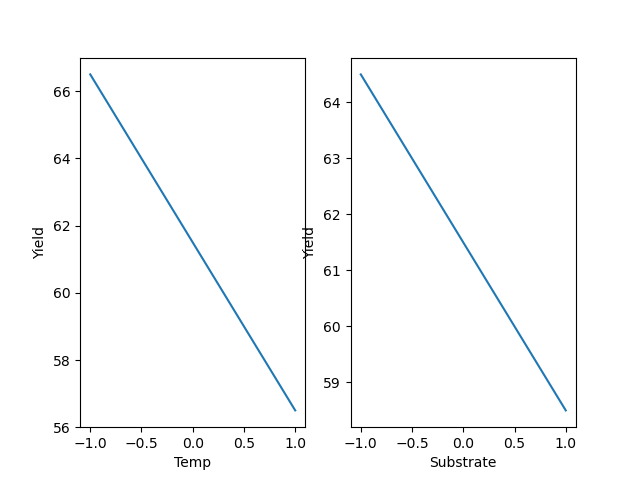

In [333]:
fig, ax =plt.subplots(1,2,sharex=True)
sns.lineplot(x="Temp",y="Yield",data=DF,ax=ax[0],errorbar=None)
sns.lineplot(x="Substrate",y="Yield",data=DF, ax=ax[1],errorbar=None)

<AxesSubplot:xlabel='Substrate', ylabel='Yield'>

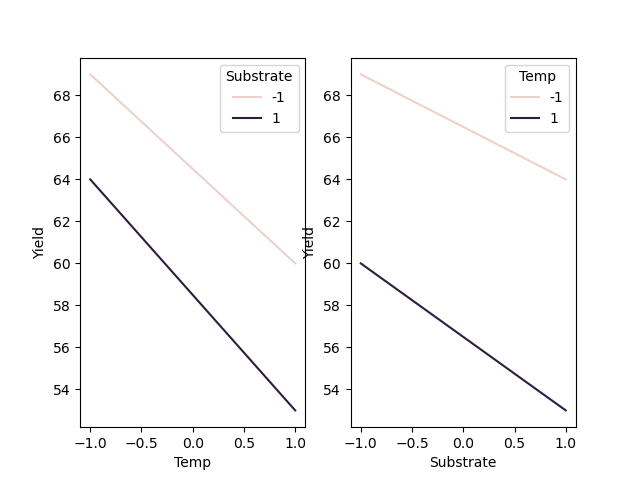

In [334]:
# factorplot, catplot
fig, ax =plt.subplots(1,2,sharex=True)
sns.lineplot(x="Temp",y="Yield",hue="Substrate",data=DF,ax=ax[0])
sns.lineplot(x="Substrate",y="Yield",hue="Temp",data=DF, ax=ax[1])

In [335]:
model1=ols('Y~X1+X2',data=DF)
results1=model1.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     68.00
Date:                Thu, 17 Nov 2022   Prob (F-statistic):             0.0854
Time:                        09:29:35   Log-Likelihood:                -2.9032
No. Observations:                   4   AIC:                             11.81
Df Residuals:                       1   BIC:                             9.965
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     61.5000      0.500    123.000      0.0

C:\Users\carol\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [336]:
model2=ols('Y~X1+X2+X1*X2',data=DF)
results2=model2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 17 Nov 2022   Prob (F-statistic):                nan
Time:                        09:29:36   Log-Likelihood:                 126.02
No. Observations:                   4   AIC:                            -244.0
Df Residuals:                       0   BIC:                            -246.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     61.5000        inf          0        n

C:\Users\carol\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\carol\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1749: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\carol\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1749: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\carol\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1671: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
C:\Users\carol\anaconda3\lib\site-packages\statsmodels\base\model.py:1512: RuntimeWarning: invalid value encountered in multiply
 

In [338]:
from statsmodels.stats.anova import anova_lm
anova_results2 = anova_lm(results2,type=3)
print(anova_results2)

           df        sum_sq  mean_sq    F  PR(>F)
X1        1.0  1.000000e+02    100.0  0.0     NaN
X2        1.0  3.600000e+01     36.0  0.0     NaN
X1:X2     1.0  1.000000e+00      1.0  0.0     NaN
Residual  0.0  1.009742e-28      inf  NaN     NaN


C:\Users\carol\anaconda3\lib\site-packages\statsmodels\stats\anova.py:138: RuntimeWarning: divide by zero encountered in double_scalars
  (model.ssr / model.df_resid))


In [337]:
X1=np.array([-1,1])
X2=np.array([-1,1])
X3=np.array([1,-1,-1,1])
Y=np.array([69,60,64,53])

XA1=([-1,1,-1,1])
XB2=([-1,-1,1,1])

In [306]:
# Creating 2-D grid of features
[Xa, Xb] = np.meshgrid(X1,X2)
Z = Y.reshape(2,2)

Text(0, 0.5, 'Substrate')

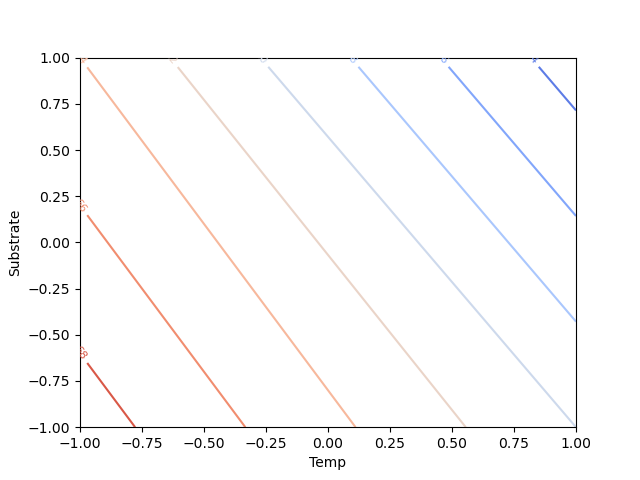

In [314]:
fig=plt.figure()
ax=fig.add_subplot(111)
Countour1=ax.contour(Xa,Xb,Z,cmap="coolwarm")
plt.clabel(Countour1, fontsize=8)
plt.xlabel("Temp")
plt.ylabel("Substrate")

Text(0.5, 0, 'Yield')

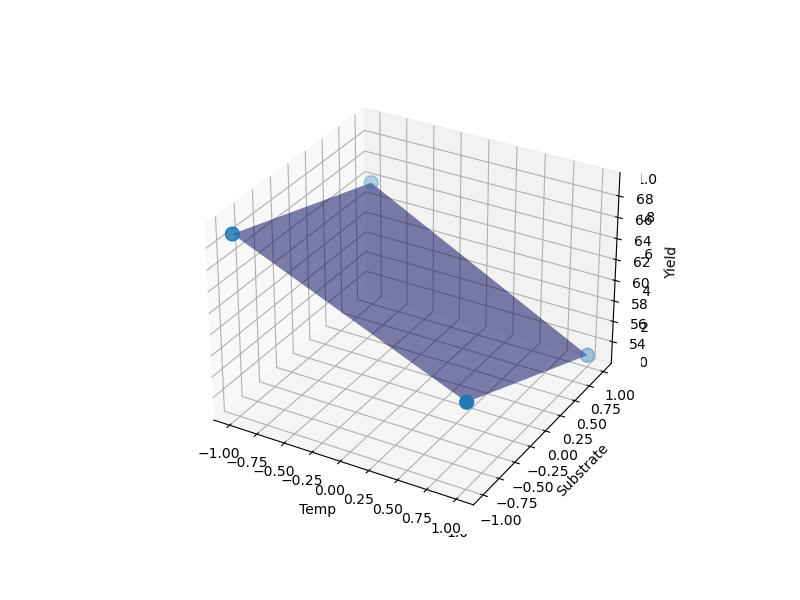

In [246]:
#%matplotlib widget
fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(8,6))
ax = fig.add_subplot(projection='3d')

ax.plot_surface(Xa, Xb, Z,color="blue", alpha=.5)
ax.scatter(XA1,XB2,Y,s=100)
ax.set_zlabel([])
ax.set_xlabel("Temp")
ax.set_ylabel("Substrate")
ax.set_zlabel("Yield")

In [247]:
DF

,Temp,Substrate,0,Yield
0,-1,-1,1,69
1,1,-1,-1,60
2,-1,1,-1,64
3,1,1,1,53


In [248]:
TA=pd.Series([338,354,338,354],name="Temp")
SA=pd.Series([1.25,1.25,1.75,1.75],name="Substrate")
YA=pd.Series([69,60,64,53],name="Yield")
DFA=pd.concat((TA,SA,YA),axis='columns')
print(DFA)

   Temp  Substrate  Yield
0   338       1.25     69
1   354       1.25     60
2   338       1.75     64
3   354       1.75     53


In [249]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

modelA=ols('YA~TA+SA+TA*SA',data=DFA)
resultsA=modelA.fit()
print(resultsA.summary())

                            OLS Regression Results                            
Dep. Variable:                     YA   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 16 Nov 2022   Prob (F-statistic):                nan
Time:                        09:08:24   Log-Likelihood:                 105.48
No. Observations:                   4   AIC:                            -203.0
Df Residuals:                       0   BIC:                            -205.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    166.0000        inf          0        n

C:\Users\carol\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\carol\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1749: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\carol\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1749: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\carol\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1671: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


Text(0.5, 0.5, 'Substrate')

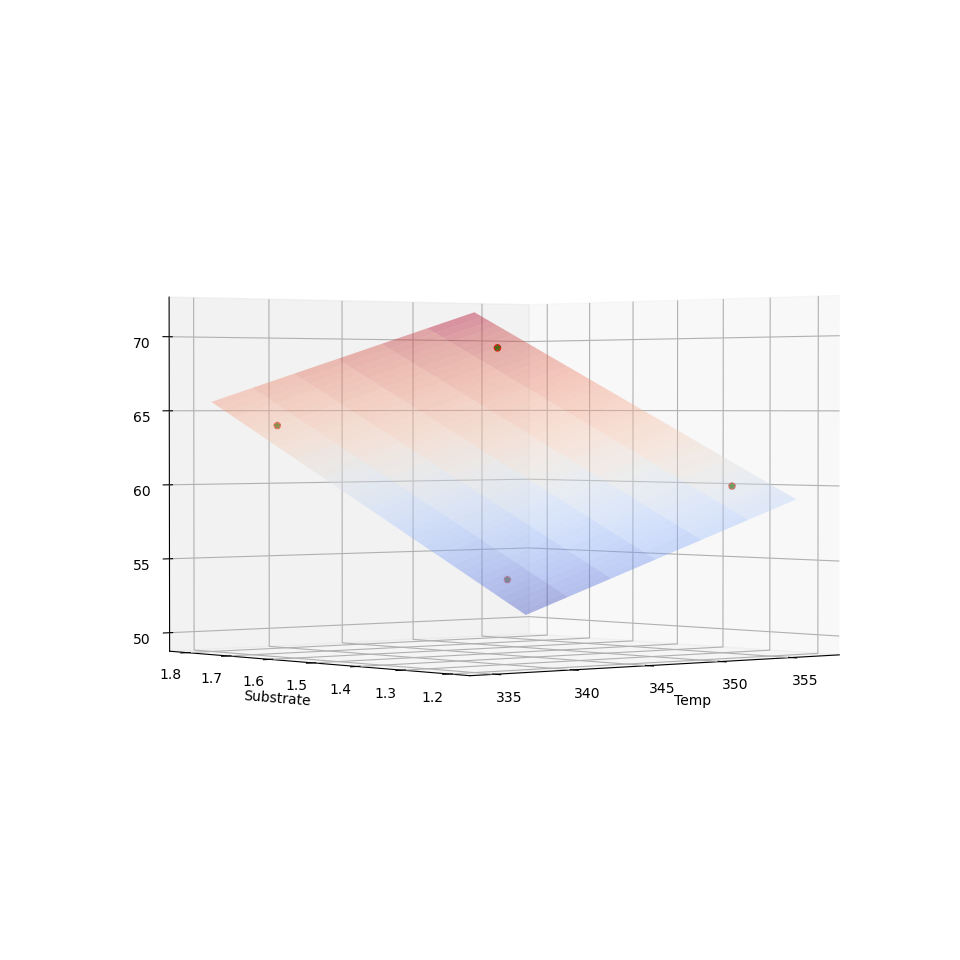

In [250]:
fig=plt.figure(figsize=plt.figaspect(1)*2)
ax=fig.add_subplot(111,projection='3d')

df = DFA
x = df["Temp"]
y = df["Substrate"]
z = df["Yield"]

x1,x2,x3=modelA.exog_names[1:]

#x_surf=np.arange(x.min(), x.max(),1)
x_surf=np.arange(335,357,.1)
y_surf=np.arange(1.2,1.8,.1)
#y_surf=np.arange(y.min(), y.max(),.1)
xS,yS=np.meshgrid(x_surf,y_surf)

exog=pd.DataFrame({x1: xS.ravel(), x2:yS.ravel()})
zS=resultsA.predict(exog=exog).values.reshape(xS.shape)
ax.plot_surface(xS,yS,zS,alpha=0.4,cmap='coolwarm')

ax.scatter(x,y,z,marker='*',color="g",label="Raw Data")
ax.view_init(elev=1,azim=230)

ax.scatter(x.values,y.values,resultsA.fittedvalues.values,label="Fited Values",color="r")

plt.xlabel("Temp")
plt.ylabel("Substrate")

In [251]:
df

,Temp,Substrate,Yield
0,338,1.25,69
1,354,1.25,60
2,338,1.75,64
3,354,1.75,53


Text(0, 0.5, 'Substrate')

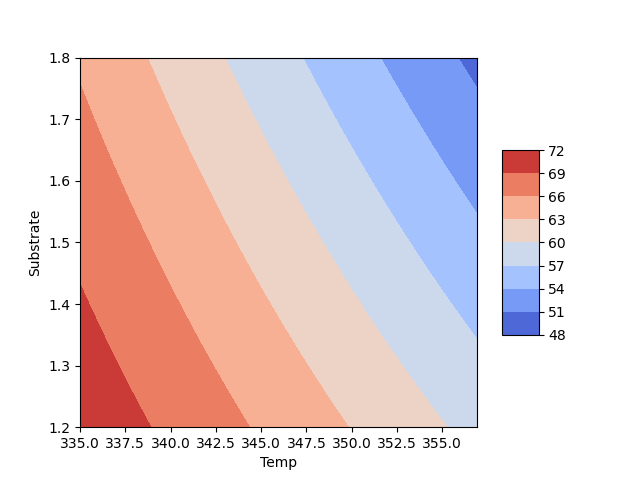

In [253]:
fig=plt.figure()
ax=fig.add_subplot(111)

CountourA=ax.contourf(xS,yS,zS,cmap="coolwarm")
fig.colorbar(CountourA,shrink=0.5, aspect=5)
plt.xlabel("Temp")
plt.ylabel("Substrate")

# Interaction effects

In [315]:
Xa=pd.Series([-1,1,-1,1],name='Temp')
Xb=pd.Series([-1,-1,1,1], name='Substrate')
Xc=pd.Series([1,-1,-1,1])
Yabc=pd.Series([77,79,81,89],name='Output')

In [316]:
DFabc=pd.concat([Xa,Xb,Xc,Yabc],axis='columns')
print(DFabc)

   Temp  Substrate  0  Output
0    -1         -1  1      77
1     1         -1 -1      79
2    -1          1 -1      81
3     1          1  1      89


In [317]:
model3=ols('Yabc~Xa+Xb+Xa*Xb',data=DFabc)
results3=model3.fit()
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:                   Yabc   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 16 Nov 2022   Prob (F-statistic):                nan
Time:                        12:06:52   Log-Likelihood:                    inf
No. Observations:                   4   AIC:                              -inf
Df Residuals:                       0   BIC:                              -inf
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     81.5000        nan        nan        n

C:\Users\carol\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\carol\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1749: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\carol\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1749: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\carol\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
C:\Users\carol\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:50: RuntimeWarning: invalid value encountered in d

<AxesSubplot:xlabel='Substrate', ylabel='Output'>

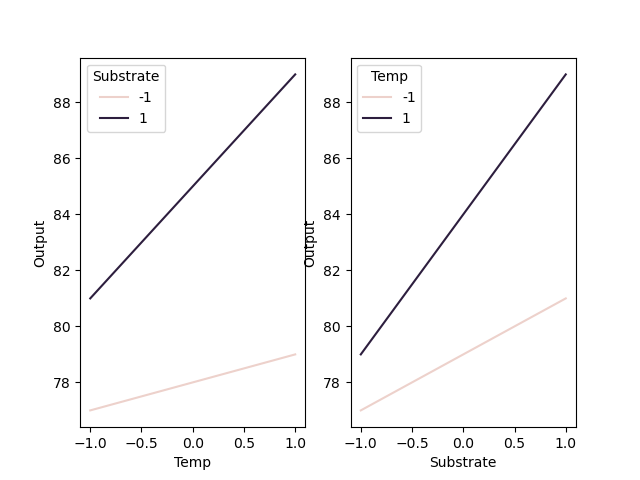

In [318]:
# factorplot, catplot
fig, ax =plt.subplots(1,2,sharex=True)
sns.lineplot(x="Temp",y="Output",hue="Substrate",data=DFabc,ax=ax[0])
sns.lineplot(x="Substrate",y="Output",hue="Temp",data=DFabc, ax=ax[1])

In [319]:
XIA=np.array([-1,1])
XIB=np.array([-1,1])
YIA=np.array([77,79,81,89])

XI1=([-1,1,-1,1])
XI2=([-1,-1,1,1])

In [320]:
# Creating 2-D grid of features
[Xa, Xb] = np.meshgrid(XIA,XIB)
Z = YIA.reshape(2,2)

Text(0, 0.5, 'Substrate')

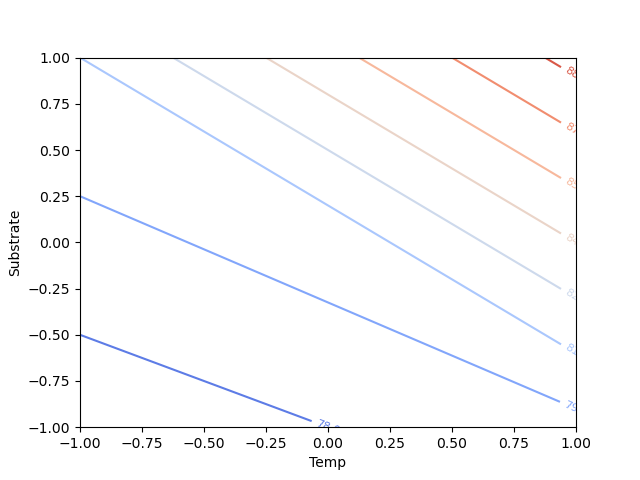

In [321]:
fig=plt.figure()
ax=fig.add_subplot(111)
Countour2=ax.contour(Xa,Xb,Z,cmap="coolwarm")
plt.clabel(Countour2, fontsize=8)
plt.xlabel("Temp")
plt.ylabel("Substrate")

Text(0.5, 0, 'Yield')

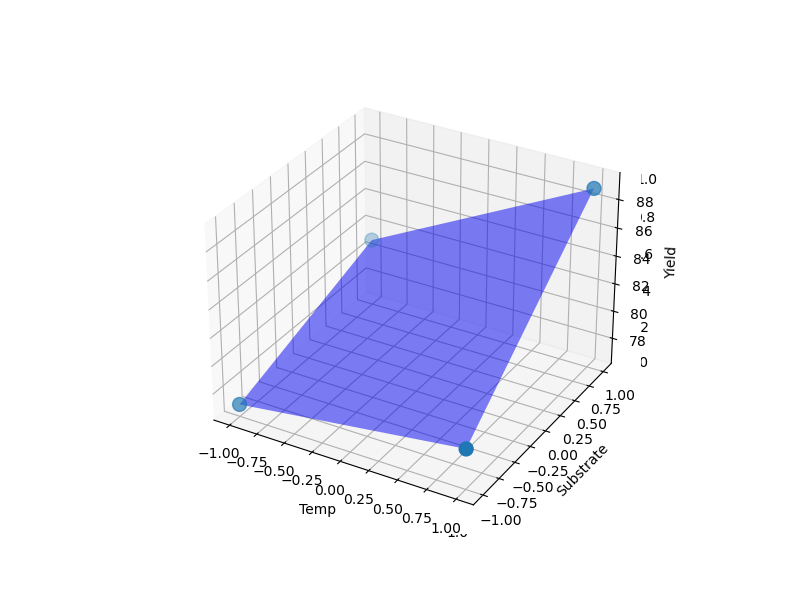

In [322]:
#%matplotlib widget
fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(8,6))
ax = fig.add_subplot(projection='3d')

ax.plot_surface(Xa, Xb, Z,color="blue", alpha=.5)
ax.scatter(XI1,XI2,YIA,s=100)
ax.set_zlabel([])
ax.set_xlabel("Temp")
ax.set_ylabel("Substrate")
ax.set_zlabel("Yield")

In [323]:
TB=pd.Series([390,400,390,400],name="Temp")
SB=pd.Series([0.5,0.5,1.25,1.25],name="Substrate")
YB=pd.Series([77,79,81,89],name="Yield")
DFB=pd.concat((TB,SB,YB),axis='columns')
print(DFB)

   Temp  Substrate  Yield
0   390       0.50     77
1   400       0.50     79
2   390       1.25     81
3   400       1.25     89


In [324]:
modelB=ols('YB~TB+SB+TB*SB',data=DFB)
resultsB=modelB.fit()
print(resultsB.summary())

                            OLS Regression Results                            
Dep. Variable:                     YB   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 16 Nov 2022   Prob (F-statistic):                nan
Time:                        12:07:05   Log-Likelihood:                 95.319
No. Observations:                   4   AIC:                            -182.6
Df Residuals:                       0   BIC:                            -185.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.3333        inf          0        n

C:\Users\carol\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\carol\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1749: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\carol\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1749: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\carol\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1671: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


Text(0.5, 0.5, 'Substrate')

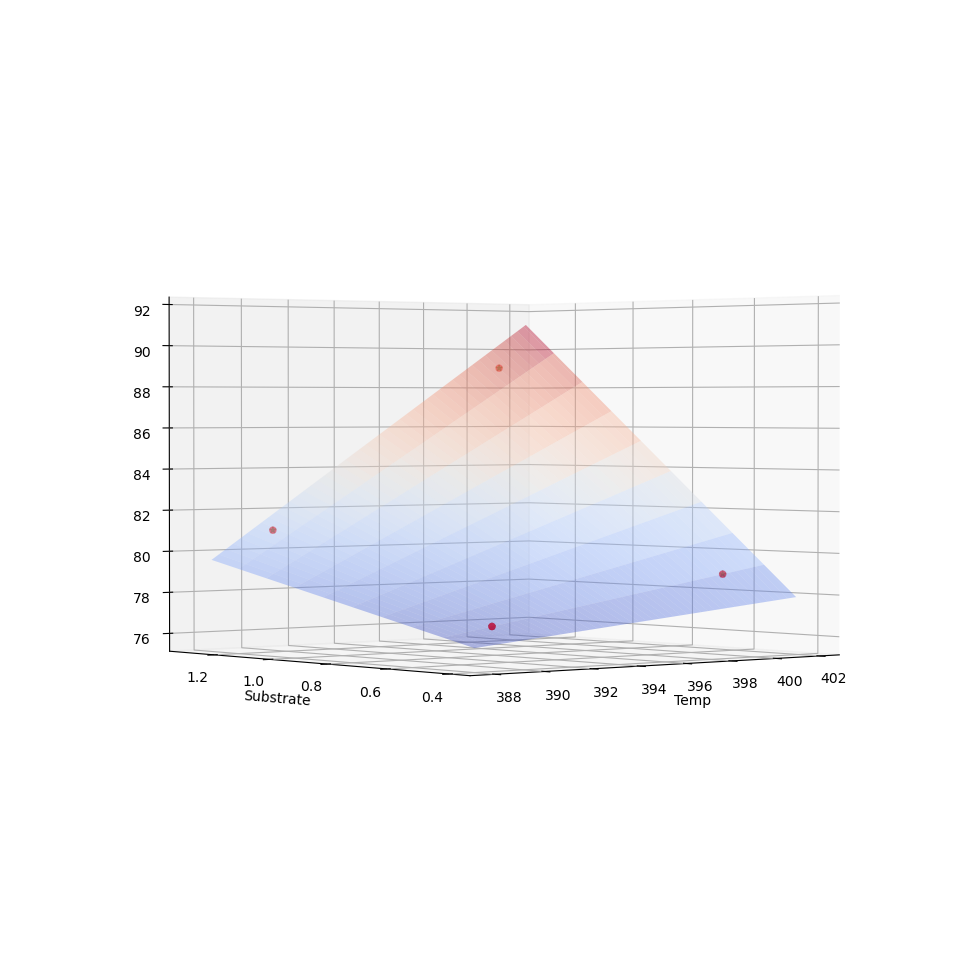

In [325]:
fig=plt.figure(figsize=plt.figaspect(1)*2)
ax=fig.add_subplot(111,projection='3d')

df = DFB
x = df["Temp"]
y = df["Substrate"]
z = df["Yield"]

x1,x2,x3=modelB.exog_names[1:]

#x_surf=np.arange(x.min(), x.max(),1)
x_surf=np.arange(388,402,.1)
y_surf=np.arange(0.4,1.4,.1)
#y_surf=np.arange(y.min(), y.max(),.1)
xS,yS=np.meshgrid(x_surf,y_surf)

exog=pd.DataFrame({x1: xS.ravel(), x2:yS.ravel()})
zS=resultsB.predict(exog=exog).values.reshape(xS.shape)
ax.plot_surface(xS,yS,zS,alpha=0.4,cmap='coolwarm')

ax.scatter(x,y,z,marker='*',color="g",label="Raw Data")
ax.view_init(elev=1,azim=230)

ax.scatter(x.values,y.values,resultsB.fittedvalues.values,label="Fited Values",color="r")

plt.xlabel("Temp")
plt.ylabel("Substrate")

Text(0, 0.5, 'Substrate')

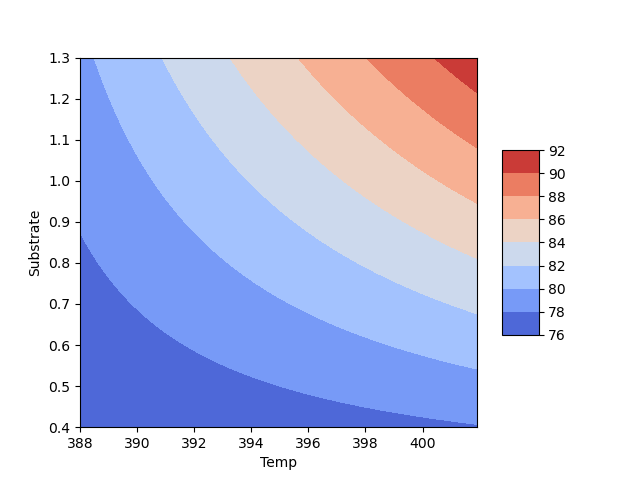

In [326]:
fig=plt.figure()
ax=fig.add_subplot(111)

CountourB=ax.contourf(xS,yS,zS,cmap="coolwarm")
fig.colorbar(CountourB,shrink=0.5, aspect=5)
plt.xlabel("Temp")
plt.ylabel("Substrate")

In [327]:
TC=pd.Series([338,354,338,354],name="Temp")
SC=pd.Series([1.25,1.25,1.75,1.75],name="Substrate")
YC=pd.Series([69,60,64,53],name="Yield")
DFC=pd.concat((TC,SC,YC),axis='columns')
print(DFC)

   Temp  Substrate  Yield
0   338       1.25     69
1   354       1.25     60
2   338       1.75     64
3   354       1.75     53


In [328]:
modelC=ols('YC~TC+SC+TC*SC',data=DFC)
resultsC=modelC.fit()
print(resultsC.summary())

                            OLS Regression Results                            
Dep. Variable:                     YC   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 16 Nov 2022   Prob (F-statistic):                nan
Time:                        12:07:14   Log-Likelihood:                 105.48
No. Observations:                   4   AIC:                            -203.0
Df Residuals:                       0   BIC:                            -205.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    166.0000        inf          0        n

C:\Users\carol\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\carol\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1749: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\carol\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1749: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\carol\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1671: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


In [291]:
#fig=plt.figure(figsize=plt.figaspect(1)*2)
#ax=fig.add_subplot(111,projection='3d')

df = DFC
x = df["Temp"]
y = df["Substrate"]
z = df["Yield"]

x1,x2,x3=modelC.exog_names[1:]

#x_surf=np.arange(x.min(), x.max(),1)
x_surf=np.arange(320,410,.01)
y_surf=np.arange(0,2.0,.01)
#y_surf=np.arange(y.min(), y.max(),.1)
xS,yS=np.meshgrid(x_surf,y_surf)

exog=pd.DataFrame({x1: xS.ravel(), x2:yS.ravel()})
zS=resultsC.predict(exog=exog).values.reshape(xS.shape)
#ax.plot_surface(xS,yS,zS,alpha=0.4,cmap='coolwarm')

#ax.scatter(x,y,z,marker='*',color="g",label="Raw Data")
#ax.view_init(elev=1,azim=230)

#ax.scatter(x.values,y.values,resultsC.fittedvalues.values,label="Fited Values",color="r")

#plt.xlabel("Temp")
#plt.ylabel("Substrate")

Text(0, 0.5, 'Substrate')

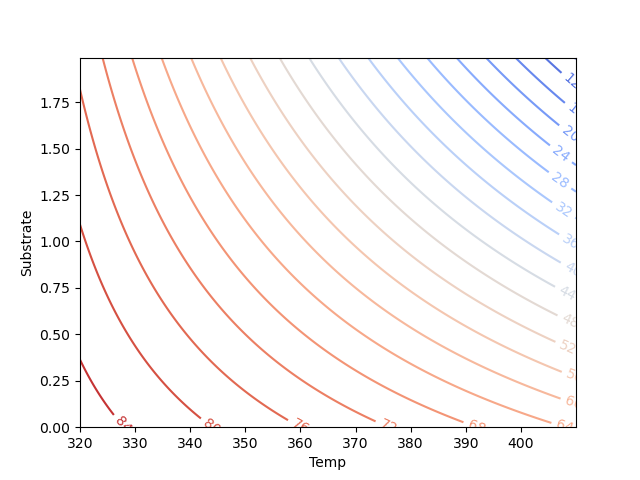

In [293]:
fig=plt.figure()
ax=fig.add_subplot(111)

CountourC=ax.contour(xS,yS,zS,25,cmap="coolwarm")
#fig.colorbar(CountourC,shrink=0.5, aspect=5)
plt.clabel(CountourC, inline=1, fontsize=10)
plt.xlabel("Temp")
plt.ylabel("Substrate")